In [160]:
import ast
import pandas as pd

# Import Census county lat/long 

In [161]:
df=pd.read_table('2021_Gaz_counties_national.txt',  sep = "\t")
df

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1539634184,25674812,594.456,9.913,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4117656514,1132955729,1589.836,437.437,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2292160149,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1612188717,9572303,622.470,3.696,33.015893,-87.127148
4,AL,1009,161530,Blount County,1670259090,14860281,644.891,5.738,33.977358,-86.566440
...,...,...,...,...,...,...,...,...,...,...
3216,PR,72145,1804553,Vega Baja Municipio,118746309,57826361,45.848,22.327,18.455128,-66.397883
3217,PR,72147,1804554,Vieques Municipio,131541389,552192821,50.788,213.203,18.125418,-65.432474
3218,PR,72149,1804555,Villalba Municipio,92298569,3622640,35.637,1.399,18.130718,-66.472244
3219,PR,72151,1804556,Yabucoa Municipio,143005188,72592515,55.215,28.028,18.059858,-65.859871


In [162]:
geocode = df.iloc[:,[0,3,8,9]]
geocode

,USPS,NAME,INTPTLAT,INTPTLONG
0,AL,Autauga County,32.532237,-86.646440
1,AL,Baldwin County,30.659218,-87.746067
2,AL,Barbour County,31.870253,-85.405104
3,AL,Bibb County,33.015893,-87.127148
4,AL,Blount County,33.977358,-86.566440
...,...,...,...,...
3216,PR,Vega Baja Municipio,18.455128,-66.397883
3217,PR,Vieques Municipio,18.125418,-65.432474
3218,PR,Villalba Municipio,18.130718,-66.472244
3219,PR,Yabucoa Municipio,18.059858,-65.859871


In [125]:
geocode.to_csv('count_lat_long.csv')

In [63]:
yield_watermuni = pd.read_excel('water_muni_2019.xlsx')
yield_watermuni.head()

,CUSIP,Issuer Name,State Code,U.S. County Of Issuance,Mod Dur (Mid),Iss Spd Wst,Issue Date,Bond Purpose,Cpn,Maturity,Mty Size,Yield at Issue,Spread to AAA BVAL (%),YTW Sprd to Mty at Iss,Tax Prov,MSRB Volume
0,13063DRE0,State of California,CA,"Sacramento, CA",6.417251,62.431046,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.500,10/1/2029,350000000,2.40,#N/A Authorization,62.431046,FED TAXABLE/ST TAX-EXEMPT,3015000.0
1,13063DRD2,State of California,CA,"Sacramento, CA",3.911377,51.640944,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.375,10/1/2026,330135000,2.20,#N/A Authorization,51.640944,FED TAXABLE/ST TAX-EXEMPT,5000.0
2,64986DJE6,New York State Environmental Facilities Corp,NY,"Albany, NY",5.924750,6.440986,10/8/2019,REFUNDING BONDS WATER UTILITY IMPS. GREEN PURPOSE,5.000,6/15/2029,16480000,1.52,#N/A Authorization,6.440986,FED & ST TAX-EXEMPT,1530000.0
3,306801N72,Town of Falmouth MA,MA,"Barnstable, MA",3.196302,-4.728995,12/12/2019,REFUNDING NOTES CURRENT REFUNDING WATER UTILIT...,5.000,2/1/2026,1935000,1.15,#N/A Authorization,-4.728995,FED & ST TAX-EXEMPT,255000.0
4,575829FB7,Massachusetts Clean Water Trust/The,MA,"Suffolk, MA",3.609202,4.950507,10/24/2019,SEWER IMPS. WATER UTILITY IMPS. GREEN PURPOSE,5.000,8/1/2026,8080000,1.31,#N/A Authorization,4.950507,FED & ST TAX-EXEMPT,5000.0


# Fuzzy match County within the Bloomberg dataset and County list from Census to fetch lat/long
both county and state information are used for fuzzy match

In [64]:
import difflib 
difflib.get_close_matches

<function difflib.get_close_matches(word, possibilities, n=3, cutoff=0.6)>

In [65]:
yield_watermuni[["U.S. County Of Issuance"]]
yield_watermuni.convert_dtypes().dtypes

CUSIP                       string
Issuer Name                 string
State Code                  string
U.S. County Of Issuance     string
Mod Dur (Mid)              Float64
Iss Spd Wst                Float64
Issue Date                  string
Bond Purpose                string
Cpn                        Float64
Maturity                    string
Mty Size                     Int64
Yield at Issue             Float64
Spread to AAA BVAL (%)      string
YTW Sprd to Mty at Iss     Float64
Tax Prov                    string
MSRB Volume                  Int64
dtype: object

In [68]:
yield_watermuni.keys()

Index(['CUSIP', 'Issuer Name', 'State Code', 'U.S. County Of Issuance',
       'Mod Dur (Mid)', 'Iss Spd Wst', 'Issue Date', 'Bond Purpose', 'Cpn',
       'Maturity', 'Mty Size', 'Yield at Issue', 'Spread to AAA BVAL (%)',
       'YTW Sprd to Mty at Iss', 'Tax Prov', 'MSRB Volume'],
      dtype='object')

In [69]:
!pip install fuzzywuzzy

In [70]:
# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz

# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

In [71]:
fuzz.ratio("this is a test", "this is a fun")

74

In [27]:
def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()
    
    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m
    
    m2 = df_1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2
    
    return df_1

In [28]:
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process

# fuzzy_merge(yield_watermuni, geocode, 'U.S. County Of Issuance', 'NAME', threshold=80)

,CUSIP,Issuer Name,State Code,U.S. County Of Issuance,Mod Dur (Mid),Iss Spd Wst,Issue Date,Bond Purpose,Cpn,Maturity,Mty Size,Yield at Issue,Spread to AAA BVAL (%),YTW Sprd to Mty at Iss,Tax Prov,MSRB Volume,matches
0,13063DRE0,State of California,CA,"Sacramento, CA",6.417251,62.431046,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.500,10/1/2029,350000000,2.40,#N/A Authorization,62.431046,FED TAXABLE/ST TAX-EXEMPT,3015000.0,Sacramento County
1,13063DRD2,State of California,CA,"Sacramento, CA",3.911377,51.640944,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.375,10/1/2026,330135000,2.20,#N/A Authorization,51.640944,FED TAXABLE/ST TAX-EXEMPT,5000.0,Sacramento County
2,64986DJE6,New York State Environmental Facilities Corp,NY,"Albany, NY",5.924750,6.440986,10/8/2019,REFUNDING BONDS WATER UTILITY IMPS. GREEN PURPOSE,5.000,6/15/2029,16480000,1.52,#N/A Authorization,6.440986,FED & ST TAX-EXEMPT,1530000.0,
3,306801N72,Town of Falmouth MA,MA,"Barnstable, MA",3.196302,-4.728995,12/12/2019,REFUNDING NOTES CURRENT REFUNDING WATER UTILIT...,5.000,2/1/2026,1935000,1.15,#N/A Authorization,-4.728995,FED & ST TAX-EXEMPT,255000.0,Barnstable County
4,575829FB7,Massachusetts Clean Water Trust/The,MA,"Suffolk, MA",3.609202,4.950507,10/24/2019,SEWER IMPS. WATER UTILITY IMPS. GREEN PURPOSE,5.000,8/1/2026,8080000,1.31,#N/A Authorization,4.950507,FED & ST TAX-EXEMPT,5000.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,933008BN3,Borough of Walnutport PA,PA,"Northampton, PA",2.182782,64.189290,5/23/2019,REFUNDING BONDS WATER UTILITY IMPS.,3.000,11/1/2024,115000,2.32,#N/A Authorization,64.189290,FED BQ/ST TAX-EXEMPT,NaN,"Northampton County, Northampton County"
3151,933033UX8,Town of Walpole MA,MA,"Norfolk, MA",0.802003,-1.616195,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2023,355000,1.58,#N/A Authorization,-1.616195,FED BQ/ST TAX-EXEMPT,120000.0,
3152,933033VA7,Town of Walpole MA,MA,"Norfolk, MA",3.480021,-1.929545,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2026,345000,1.70,#N/A Authorization,-1.929545,FED BQ/ST TAX-EXEMPT,160000.0,
3153,933033VB5,Town of Walpole MA,MA,"Norfolk, MA",4.298131,-2.891156,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2027,285000,1.74,#N/A Authorization,-2.891156,FED BQ/ST TAX-EXEMPT,NaN,


In [72]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
  
# empty lists for storing the matches
# later
mat1 = []
mat2 = []
p = []
  
# converting dataframe column 
# to list of elements
# to do fuzzy matching
list1 = yield_watermuni['U.S. County Of Issuance'].tolist()
list2 = geocode['NAME'].tolist()
  
# taking the threshold as 80
threshold = 80
  
# iterating through list1 to extract
# it's closest match from list2
for i in list1:
    mat1.append(process.extractOne(
      i, list2, scorer=fuzz.token_set_ratio))
yield_watermuni['matches'] = mat1
  
# iterating through the closest matches
# to filter out the maximum closest match
for j in yield_watermuni['matches']:
    if j[1] >= threshold:
        p.append(j[0])
    mat2.append(",".join(p))
    p = []
  
  
# storing the resultant matches back 
# to dframe1
yield_watermuni['matches'] = mat2
print("\nDataFrame after Fuzzy matching using token_set_ratio():")
yield_watermuni


DataFrame after Fuzzy matching using token_set_ratio():


,CUSIP,Issuer Name,State Code,U.S. County Of Issuance,Mod Dur (Mid),Iss Spd Wst,Issue Date,Bond Purpose,Cpn,Maturity,Mty Size,Yield at Issue,Spread to AAA BVAL (%),YTW Sprd to Mty at Iss,Tax Prov,MSRB Volume,matches
0,13063DRE0,State of California,CA,"Sacramento, CA",6.417251,62.431046,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.500,10/1/2029,350000000,2.40,#N/A Authorization,62.431046,FED TAXABLE/ST TAX-EXEMPT,3015000.0,Sacramento County
1,13063DRD2,State of California,CA,"Sacramento, CA",3.911377,51.640944,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.375,10/1/2026,330135000,2.20,#N/A Authorization,51.640944,FED TAXABLE/ST TAX-EXEMPT,5000.0,Sacramento County
2,64986DJE6,New York State Environmental Facilities Corp,NY,"Albany, NY",5.924750,6.440986,10/8/2019,REFUNDING BONDS WATER UTILITY IMPS. GREEN PURPOSE,5.000,6/15/2029,16480000,1.52,#N/A Authorization,6.440986,FED & ST TAX-EXEMPT,1530000.0,Albany County
3,306801N72,Town of Falmouth MA,MA,"Barnstable, MA",3.196302,-4.728995,12/12/2019,REFUNDING NOTES CURRENT REFUNDING WATER UTILIT...,5.000,2/1/2026,1935000,1.15,#N/A Authorization,-4.728995,FED & ST TAX-EXEMPT,255000.0,Barnstable County
4,575829FB7,Massachusetts Clean Water Trust/The,MA,"Suffolk, MA",3.609202,4.950507,10/24/2019,SEWER IMPS. WATER UTILITY IMPS. GREEN PURPOSE,5.000,8/1/2026,8080000,1.31,#N/A Authorization,4.950507,FED & ST TAX-EXEMPT,5000.0,Suffolk County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,933008BN3,Borough of Walnutport PA,PA,"Northampton, PA",2.182782,64.189290,5/23/2019,REFUNDING BONDS WATER UTILITY IMPS.,3.000,11/1/2024,115000,2.32,#N/A Authorization,64.189290,FED BQ/ST TAX-EXEMPT,NaN,Northampton County
3151,933033UX8,Town of Walpole MA,MA,"Norfolk, MA",0.802003,-1.616195,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2023,355000,1.58,#N/A Authorization,-1.616195,FED BQ/ST TAX-EXEMPT,120000.0,Norfolk County
3152,933033VA7,Town of Walpole MA,MA,"Norfolk, MA",3.480021,-1.929545,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2026,345000,1.70,#N/A Authorization,-1.929545,FED BQ/ST TAX-EXEMPT,160000.0,Norfolk County
3153,933033VB5,Town of Walpole MA,MA,"Norfolk, MA",4.298131,-2.891156,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2027,285000,1.74,#N/A Authorization,-2.891156,FED BQ/ST TAX-EXEMPT,NaN,Norfolk County


In [81]:
mergefile = pd.merge(yield_watermuni, geocode, how = 'left', left_on = ['matches', 'State Code'], right_on = ['NAME', 'USPS'])
mergefile

,CUSIP,Issuer Name,State Code,U.S. County Of Issuance,Mod Dur (Mid),Iss Spd Wst,Issue Date,Bond Purpose,Cpn,Maturity,...,Yield at Issue,Spread to AAA BVAL (%),YTW Sprd to Mty at Iss,Tax Prov,MSRB Volume,matches,USPS,NAME,INTPTLAT,INTPTLONG
0,13063DRE0,State of California,CA,"Sacramento, CA",6.417251,62.431046,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.500,10/1/2029,...,2.40,#N/A Authorization,62.431046,FED TAXABLE/ST TAX-EXEMPT,3015000.0,Sacramento County,CA,Sacramento County,38.450136,-121.344329
1,13063DRD2,State of California,CA,"Sacramento, CA",3.911377,51.640944,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.375,10/1/2026,...,2.20,#N/A Authorization,51.640944,FED TAXABLE/ST TAX-EXEMPT,5000.0,Sacramento County,CA,Sacramento County,38.450136,-121.344329
2,64986DJE6,New York State Environmental Facilities Corp,NY,"Albany, NY",5.924750,6.440986,10/8/2019,REFUNDING BONDS WATER UTILITY IMPS. GREEN PURPOSE,5.000,6/15/2029,...,1.52,#N/A Authorization,6.440986,FED & ST TAX-EXEMPT,1530000.0,Albany County,NY,Albany County,42.588240,-73.974010
3,306801N72,Town of Falmouth MA,MA,"Barnstable, MA",3.196302,-4.728995,12/12/2019,REFUNDING NOTES CURRENT REFUNDING WATER UTILIT...,5.000,2/1/2026,...,1.15,#N/A Authorization,-4.728995,FED & ST TAX-EXEMPT,255000.0,Barnstable County,MA,Barnstable County,41.706123,-70.164823
4,575829FB7,Massachusetts Clean Water Trust/The,MA,"Suffolk, MA",3.609202,4.950507,10/24/2019,SEWER IMPS. WATER UTILITY IMPS. GREEN PURPOSE,5.000,8/1/2026,...,1.31,#N/A Authorization,4.950507,FED & ST TAX-EXEMPT,5000.0,Suffolk County,MA,Suffolk County,42.338551,-71.018253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,933008BN3,Borough of Walnutport PA,PA,"Northampton, PA",2.182782,64.189290,5/23/2019,REFUNDING BONDS WATER UTILITY IMPS.,3.000,11/1/2024,...,2.32,#N/A Authorization,64.189290,FED BQ/ST TAX-EXEMPT,NaN,Northampton County,PA,Northampton County,40.752791,-75.307447
3151,933033UX8,Town of Walpole MA,MA,"Norfolk, MA",0.802003,-1.616195,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2023,...,1.58,#N/A Authorization,-1.616195,FED BQ/ST TAX-EXEMPT,120000.0,Norfolk County,MA,Norfolk County,42.171738,-71.181110
3152,933033VA7,Town of Walpole MA,MA,"Norfolk, MA",3.480021,-1.929545,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2026,...,1.70,#N/A Authorization,-1.929545,FED BQ/ST TAX-EXEMPT,160000.0,Norfolk County,MA,Norfolk County,42.171738,-71.181110
3153,933033VB5,Town of Walpole MA,MA,"Norfolk, MA",4.298131,-2.891156,5/15/2019,WATER UTILITY IMPS. SCHOOL IMPS.,5.000,5/15/2027,...,1.74,#N/A Authorization,-2.891156,FED BQ/ST TAX-EXEMPT,NaN,Norfolk County,MA,Norfolk County,42.171738,-71.181110


In [83]:
mergefile.to_csv('out.csv')

# Final file with yield and water stress data combined 

In [185]:
final =pd.read_csv('Aqueduct_yield.csv')
final.head(3)

,Unnamed: 0,CUSIP,Issuer Name,State Code,U.S. County Of Issuance,Mod Dur (Mid),Iss Spd Wst,Issue Date,Bond Purpose,Cpn,...,Yield at Issue,Spread to AAA BVAL (%),YTW Sprd to Mty at Iss,Tax Prov,MSRB Volume,matches,USPS,NAME,INTPTLAT,INTPTLONG
0,0,13063DRE0,State of California,CA,"Sacramento, CA",6.417251,62.431046,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.500,...,2.40,#N/A Authorization,62.431046,FED TAXABLE/ST TAX-EXEMPT,3015000.0,Sacramento County,CA,Sacramento County,38.450136,-121.344329
1,1,13063DRD2,State of California,CA,"Sacramento, CA",3.911377,51.640944,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.375,...,2.20,#N/A Authorization,51.640944,FED TAXABLE/ST TAX-EXEMPT,5000.0,Sacramento County,CA,Sacramento County,38.450136,-121.344329
2,2,64986DJE6,New York State Environmental Facilities Corp,NY,"Albany, NY",5.924750,6.440986,10/8/2019,REFUNDING BONDS WATER UTILITY IMPS. GREEN PURPOSE,5.000,...,1.52,#N/A Authorization,6.440986,FED & ST TAX-EXEMPT,1530000.0,Albany County,NY,Albany County,42.588240,-73.974010


In [186]:
final.describe()

,Unnamed: 0,Mod Dur (Mid),Iss Spd Wst,Cpn,Mty Size,Yield at Issue,YTW Sprd to Mty at Iss,MSRB Volume,INTPTLAT,INTPTLONG
count,3155.000000,3151.000000,3141.000000,3154.000000,3.155000e+03,3154.000000,3141.000000,1.103000e+03,3154.000000,3154.000000
mean,1577.000000,2.626932,29.820384,3.983413,1.401926e+06,1.737766,29.824591,1.993418e+05,36.959521,-92.483087
std,910.914376,1.691086,28.802876,1.103807,8.947806e+06,0.395905,28.801843,6.642356e+05,5.562748,13.369741
min,0.000000,0.030533,-32.082063,0.050000,5.000000e+03,0.900000,-32.082063,2.000000e+03,22.012038,-159.705965
25%,788.500000,1.090829,8.930145,3.000000,1.400000e+05,1.450000,8.930145,3.000000e+04,30.789630,-97.310639
50%,1577.000000,2.420315,25.503740,4.000000,3.400000e+05,1.700000,25.555959,6.000000e+04,37.681045,-94.733647
75%,2365.500000,3.968940,46.752953,5.000000,9.150000e+05,2.000000,46.752953,1.500000e+05,42.171738,-83.926558
max,3154.000000,6.800639,342.019260,7.000000,3.500000e+08,5.600000,342.019260,1.113000e+07,48.069247,-70.164823


In [164]:
Unique_location_forWaterrisk = final.drop_duplicates(subset=['USPS', 'NAME'], keep='last')
Unique_location_forWaterrisk.to_excel('locationforAqudt.xlsx')

In [165]:
waterrisk = pd.read_csv('aqueduct_20220719.csv')
waterrisk['longitude'].nunique()

279

In [166]:
final_risk = pd.merge(final, waterrisk, how = 'left', left_on = ['INTPTLAT'], right_on = ['latitude'])
final_risk.head(3)

,Unnamed: 0,CUSIP,Issuer Name,State Code,U.S. County Of Issuance,Mod Dur (Mid),Iss Spd Wst,Issue Date,Bond Purpose,Cpn,...,w_awr_tex_rrr_raw,w_awr_tex_rrr_score,w_awr_tex_rrr_cat,w_awr_tex_rrr_label,w_awr_tex_rrr_weight_fraction,w_awr_tex_tot_raw,w_awr_tex_tot_score,w_awr_tex_tot_cat,w_awr_tex_tot_label,w_awr_tex_tot_weight_fraction
0,0,13063DRE0,State of California,CA,"Sacramento, CA",6.417251,62.431046,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.500,...,0.637859,1.310914,1.0,Low - Medium (1-2),0.326531,1.604262,1.989952,1.0,Low - Medium (1-2),1.000000
1,1,13063DRD2,State of California,CA,"Sacramento, CA",3.911377,51.640944,10/24/2019,PUBLIC FACILITIES WATER UTILITY IMPS. REFUNDIN...,2.375,...,0.637859,1.310914,1.0,Low - Medium (1-2),0.326531,1.604262,1.989952,1.0,Low - Medium (1-2),1.000000
2,2,64986DJE6,New York State Environmental Facilities Corp,NY,"Albany, NY",5.924750,6.440986,10/8/2019,REFUNDING BONDS WATER UTILITY IMPS. GREEN PURPOSE,5.000,...,0.584215,1.261548,1.0,Low - Medium (1-2),0.326531,0.751871,0.743294,0.0,Low (0-1),0.918367


In [167]:
import statsmodels.formula.api as sm
from sklearn import linear_model

# Water risk linear regression tests
Physical risk quantity:  
bws:Baseline water stress   
bwd:Baseline water depletion   
iav:Interannual variability  
sev:Seasonal variability   
gtd:Groundwater table decline   
rfr:Riverine flood risk   
cfr:Coastal flood risk   
drr:Drought risk   

Physical risk quality:   
ucw:Untreated connected wastewater    
cep:Coastal eutrophication potential    

Regulatory and reputational risk:    
udw:Unimproved/no drinking water   
usa:Unimproved/no sanitation   
rri:Peak RepRisk country ESG risk index   

In [172]:
y = final_risk["Iss Spd Wst"]
x1 = final_risk["bws_score"]

df = pd.DataFrame({'x1':x1, 'y':y})
model = sm.ols('y~x1', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02176
Date:                Wed, 20 Jul 2022   Prob (F-statistic):              0.883
Time:                        13:39:05   Log-Likelihood:                -14845.
No. Observations:                3109   AIC:                         2.969e+04
Df Residuals:                    3107   BIC:                         2.971e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9270      0.814     36.780      0.000      28.332      31.522
x1            -0.0529      0.359     -0.148      0.883      -0.756       0.651
==============================================================================
Omnibus:                     1223.198   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12403.679
Skew:                           1.578   Prob(JB):                         0.00
Kurtosis:                      12.262   Cond. No.                         4.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
y = final_risk["Iss Spd Wst"]
x1 = final_risk["bws_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
x4 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3, 'x4':x4})
model = sm.ols('y~x1+x2+x3+x4', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     47.64
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          7.02e-319
Time:                        13:44:31   Log-Likelihood:                -14006.
No. Observations:                3109   AIC:                         2.811e+04
Df Residuals:                    3062   BIC:                         2.839e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.8151      4.152     20.909      0.000      78.674      94.956
x4[T.AR]      -0.2221      6.009     -0.037      0.971     -12.004      11.560
x4[T.AZ]     -16.8153      6.254     -2.689      0.007     -29.078      -4.553
x4[T.CA]     -31.5394      4.310     -7.317      0.000     -39.991     -23.088
x4[T.CO]     -28.9187      5.251     -5.508      0.000     -39.214     -18.624
x4[T.CT]     -43.9476      5.325     -8.253      0.000     -54.388     -33.507
x4[T.DC]     -47.6543     10.605     -4.494      0.000     -68.448     -26.861
x4[T.FL]      -4.3599      5.494     -0.794      0.427     -15.132       6.412
x4[T.GA]     -37.8894      7.713     -4.913      0.000     -53.012     -22.767
x4[T.HI]   -5.312e-13   6.33e-14     -8.397      0.000   -6.55e-13   -4.07e-13
x4[T.IA]     -33.7145      4.728     -7.131      0.000     -42.985     -24.444
x4[T.IL]     -12.3272      4.421     -2.788      0.005     -20.996      -3.658
x4[T.IN]     -27.9474      4.911     -5.691      0.000     -37.576     -18.319
x4[T.KS]     -33.1730      5.191     -6.390      0.000     -43.352     -22.994
x4[T.KY]     -19.2981      5.840     -3.305      0.001     -30.748      -7.848
x4[T.LA]     -24.1844      7.074     -3.419      0.001     -38.054     -10.315
x4[T.MA]     -54.9084      4.345    -12.636      0.000     -63.428     -46.388
x4[T.MD]     -46.5371      4.749     -9.799      0.000     -55.849     -37.225
x4[T.ME]     -47.8854      8.702     -5.503      0.000     -64.949     -30.822
x4[T.MI]     -34.8013      5.159     -6.746      0.000     -44.917     -24.686
x4[T.MN]     -39.4140      4.221     -9.338      0.000     -47.690     -31.138
x4[T.MO]     -16.3810      5.492     -2.983      0.003     -27.149      -5.613
x4[T.MS]     -20.2472      5.325     -3.802      0.000     -30.689      -9.806
x4[T.MT]      35.6816      9.818      3.634      0.000      16.431      54.932
x4[T.NC]     -41.7303      5.674     -7.354      0.000     -52.856     -30.604
x4[T.NE]     -26.0388     10.661     -2.442      0.015     -46.943      -5.135
x4[T.NH]     -10.3508      6.628     -1.562      0.118     -23.346       2.644
x4[T.NJ]     -43.2177      5.079     -8.510      0.000     -53.176     -33.260
x4[T.NM]     -30.0158      9.334     -3.216      0.001     -48.318     -11.714
x4[T.NV]      40.4756      7.259      5.576      0.000      26.243      54.708
x4[T.NY]     -57.5980      4.249    -13.556      0.000     -65.929     -49.267
x4[T.OH]     -42.5529      5.266     -8.080      0.000     -52.879     -32.227
x4[T.OK]     -31.8513      6.646     -4.793      0.000     -44.882     -18.821
x4[T.OR]     -36.8324      5.638     -6.533      0.000     -47.886     -25.778
x4[T.PA]     -21.7624      5.130     -4.242      0.000     -31.821     -11.704
x4[T.RI]     -49.4481      7.087     -6.977      0.000     -63.344     -35.552
x4

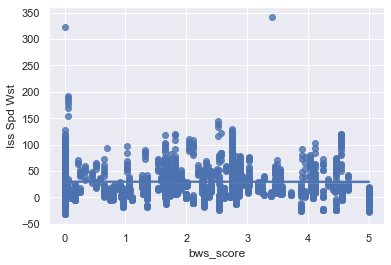

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.regplot(x="bws_score", y="Iss Spd Wst", data=final_risk);

In [150]:
y = final_risk["Iss Spd Wst"]
x = final_risk["bwd_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.813
Date:                Tue, 19 Jul 2022   Prob (F-statistic):              0.178
Time:                        16:26:47   Log-Likelihood:                -14844.
No. Observations:                3109   AIC:                         2.969e+04
Df Residuals:                    3107   BIC:                         2.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6328      0.785     39.014      0.000      29.093      32.172
x             -0.8796      0.653     -1.346      0.178      -2.161       0.401
==============================================================================
Omnibus:                     1228.238   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12433.937
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                      12.269   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
y = final_risk["Iss Spd Wst"]
x = final_risk["iav_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     24.68
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           7.13e-07
Time:                        16:27:16   Log-Likelihood:                -14833.
No. Observations:                3109   AIC:                         2.967e+04
Df Residuals:                    3107   BIC:                         2.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3547      1.409     25.802      0.000      33.592      39.117
x             -3.7310      0.751     -4.968      0.000      -5.204      -2.258
==============================================================================
Omnibus:                     1246.913   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12750.548
Skew:                           1.614   Prob(JB):                         0.00
Kurtosis:                      12.381   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
y = final_risk["Iss Spd Wst"]
x = final_risk["gtd_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.361
Date:                Tue, 19 Jul 2022   Prob (F-statistic):              0.244
Time:                        16:32:30   Log-Likelihood:                -5334.7
No. Observations:                1097   AIC:                         1.067e+04
Df Residuals:                    1095   BIC:                         1.068e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8510      2.837     15.106      0.000      37.285      48.417
x             -1.6455      1.411     -1.166      0.244      -4.413       1.122
==============================================================================
Omnibus:                      420.085   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3097.498
Skew:                           1.575   Prob(JB):                         0.00
Kurtosis:                      10.606   Cond. No.                         7.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

rfr: Riverine flood risk

In [154]:
y = final_risk["Iss Spd Wst"]
x = final_risk["drr_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     177.9
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.66e-39
Time:                        16:29:26   Log-Likelihood:                -14759.
No. Observations:                3109   AIC:                         2.952e+04
Df Residuals:                    3107   BIC:                         2.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2103      2.896     -2.835      0.005     -13.888      -2.532
x             18.2582      1.369     13.338      0.000      15.574      20.942
==============================================================================
Omnibus:                     1495.529   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20503.664
Skew:                           1.931   Prob(JB):                         0.00
Kurtosis:                      14.973   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
y = final_risk["Iss Spd Wst"]
x1 = final_risk["drr_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
# x4 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3
                   # , 'x4':x4
                  })
model = sm.ols('y~x1+x2+x3', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     242.1
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          3.58e-141
Time:                        13:48:00   Log-Likelihood:                -14518.
No. Observations:                3109   AIC:                         2.904e+04
Df Residuals:                    3105   BIC:                         2.907e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6109      3.496     11.045      0.000      31.756      45.465
x1            13.4883      1.289     10.461      0.000      10.960      16.016
x2             0.8723      0.279      3.122      0.002       0.324       1.420
x3            -9.8470      0.433    -22.767      0.000     -10.695      -8.999
==============================================================================
Omnibus:                     1783.151   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41806.053
Skew:                           2.256   Prob(JB):                         0.00
Kurtosis:                      20.388   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

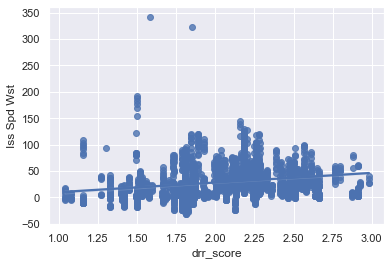

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.regplot(x="drr_score", y="Iss Spd Wst", data=final_risk);

NOTE 
* drr: Drought risk

In [155]:
y = final_risk["Iss Spd Wst"]
x = final_risk["cfr_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     161.8
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           3.63e-36
Time:                        16:31:50   Log-Likelihood:                -14766.
No. Observations:                3109   AIC:                         2.954e+04
Df Residuals:                    3107   BIC:                         2.955e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1626      0.534     60.244      0.000      31.116      33.209
x            -11.7702      0.925    -12.719      0.000     -13.585      -9.956
==============================================================================
Omnibus:                     1498.087   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22066.678
Skew:                           1.911   Prob(JB):                         0.00
Kurtosis:                      15.479   Cond. No.                         1.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
y = final_risk["Iss Spd Wst"]
x = final_risk["rfr_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     108.8
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           4.63e-25
Time:                        16:33:57   Log-Likelihood:                -14792.
No. Observations:                3109   AIC:                         2.959e+04
Df Residuals:                    3107   BIC:                         2.960e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8943      0.836     27.398      0.000      21.256      24.533
x              5.3291      0.511     10.431      0.000       4.327       6.331
==============================================================================
Omnibus:                     1218.968   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13221.204
Skew:                           1.550   Prob(JB):                         0.00
Kurtosis:                      12.615   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
y = final_risk["Iss Spd Wst"]
x1 = final_risk["rfr_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
# x4 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3
                    # , 'x4':x4
                  })
model = sm.ols('y~x1+x2+x3', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     232.5
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          4.59e-136
Time:                        14:14:21   Log-Likelihood:                -14530.
No. Observations:                3109   AIC:                         2.907e+04
Df Residuals:                    3105   BIC:                         2.909e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3740      1.975     31.580      0.000      58.501      66.247
x1             4.3818      0.475      9.228      0.000       3.451       5.313
x2             0.9643      0.281      3.426      0.001       0.412       1.516
x3           -10.2505      0.430    -23.840      0.000     -11.094      -9.407
==============================================================================
Omnibus:                     1568.045   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31205.607
Skew:                           1.931   Prob(JB):                         0.00
Kurtosis:                      18.032   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""